In [2]:
# !pip install matplotlib pandas seaborn numpy

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("medical_examination.csv")
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# 2
df["overweight"] = (df["weight"] / ((df["height"] / 100) ** 2) > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [5]:
# 3
df["cholesterol"] = df["cholesterol"].apply(lambda x: 0 if x == 1 else 1)
df["gluc"] = df["gluc"].apply(lambda x: 0 if x == 1 else 1)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [6]:
# 4
df_cat = df.melt(
    id_vars=["cardio"],
    value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
    var_name="feature",
    value_name="value",
)
df_cat

,cardio,feature,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [7]:
# 5
df_grouped = (
    df_cat.groupby(["cardio", "feature", "value"]).size().reset_index(name="total")
)
df_grouped

,cardio,feature,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


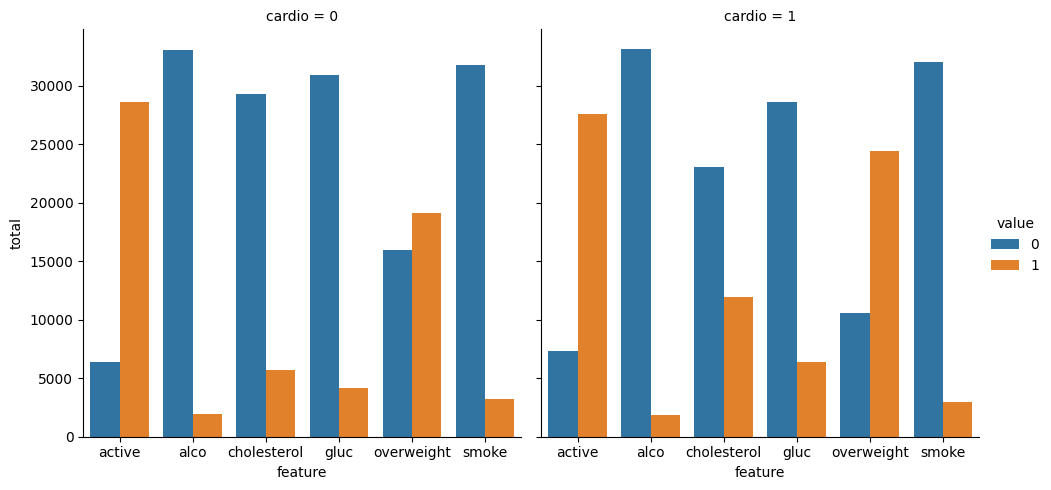

In [8]:
sns.catplot(
    data=df_grouped,
    x="feature",
    y="total",
    hue="value",
    kind="bar",
    col="cardio",
)

plt.show()

In [20]:
df[df["height"] >= df["height"].quantile(0.975)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
14,23,14532,2,181,95.0,130,90,0,0,1,1,1,0,1
62,81,20330,2,187,115.0,130,90,0,0,0,1,1,0,1
74,103,16039,2,180,90.0,140,90,1,1,0,0,0,0,1
76,105,20397,2,188,105.0,120,80,0,0,0,0,1,1,1
94,127,15946,2,185,88.0,133,89,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69913,99862,18748,2,186,101.0,110,80,1,0,0,0,1,0,1
69975,99963,21264,2,182,100.0,120,80,0,0,0,0,1,1,1
69981,99972,17500,2,182,110.0,130,90,1,1,0,0,1,1,1
69986,99978,18198,2,180,78.0,120,80,0,0,0,0,1,0,0
